In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/plant_health_data.csv')

In [4]:
df.head()

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

In [6]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               1200 non-null   datetime64[ns]
 1   Plant_ID                1200 non-null   int64         
 2   Soil_Moisture           1200 non-null   float64       
 3   Ambient_Temperature     1200 non-null   float64       
 4   Soil_Temperature        1200 non-null   float64       
 5   Humidity                1200 non-null   float64       
 6   Light_Intensity         1200 non-null   float64       
 7   Soil_pH                 1200 non-null   float64       
 8   Nitrogen_Level          1200 non-null   float64       
 9   Phosphorus_Level        1200 non-null   float64       
 10  Potassium_Level         1200 non-null   float64       
 11  Chlorophyll_Content     1200 non-null   float64       
 12  Electrochemical_Signal  1200 non-null   float64 

In [8]:
df.isnull().sum()

,0
Timestamp,0
Plant_ID,0
Soil_Moisture,0
Ambient_Temperature,0
Soil_Temperature,0
Humidity,0
Light_Intensity,0
Soil_pH,0
Nitrogen_Level,0
Phosphorus_Level,0


In [9]:
df['Plant_Health_Status'].value_counts(normalize = True)*100

,proportion
Plant_Health_Status,
High Stress,41.666667
Moderate Stress,33.416667
Healthy,24.916667


In [10]:
df.select_dtypes(include = 'object').columns

Index(['Plant_Health_Status'], dtype='object')

#Univarient Analysis

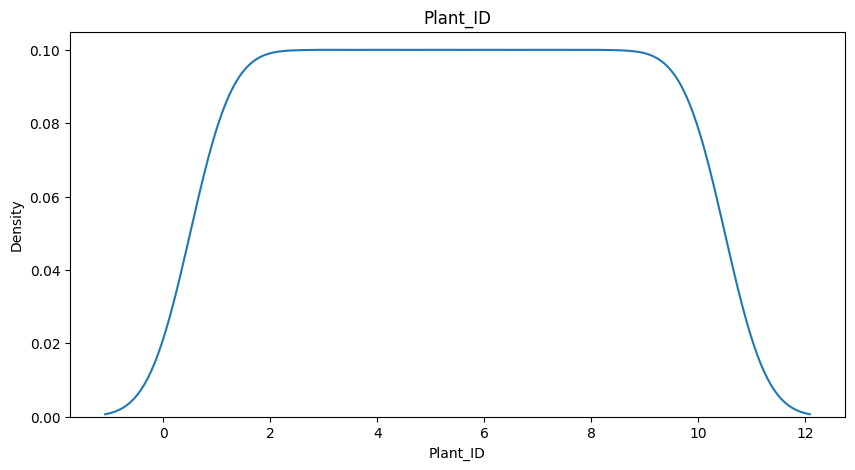

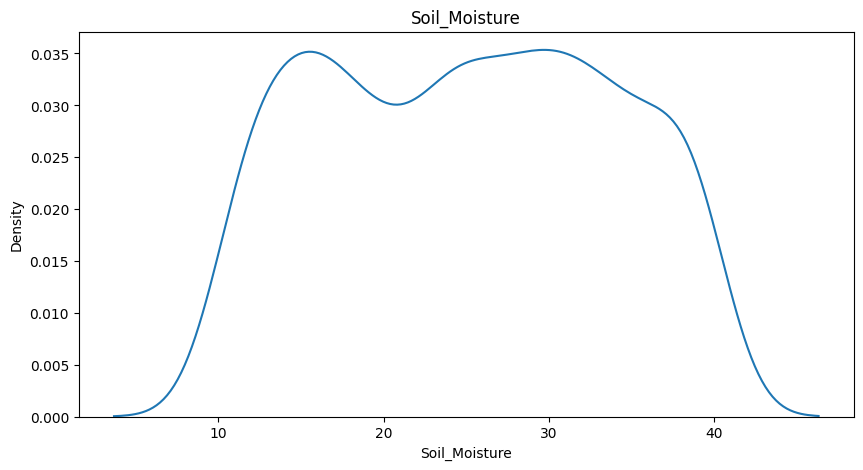

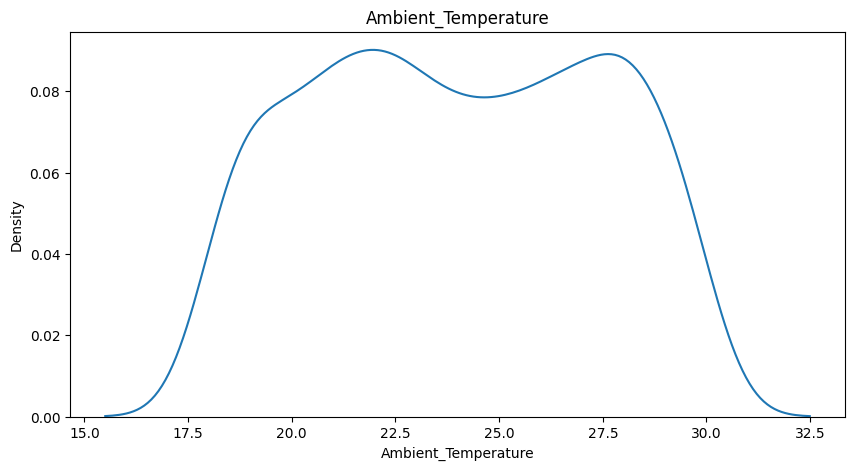

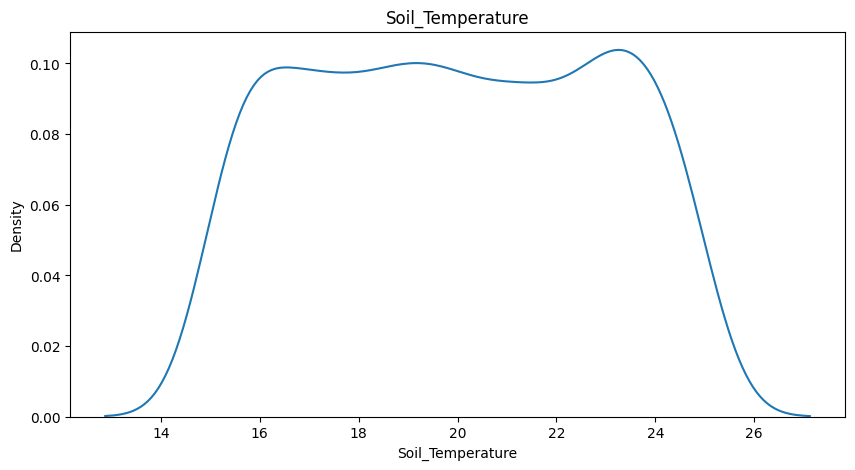

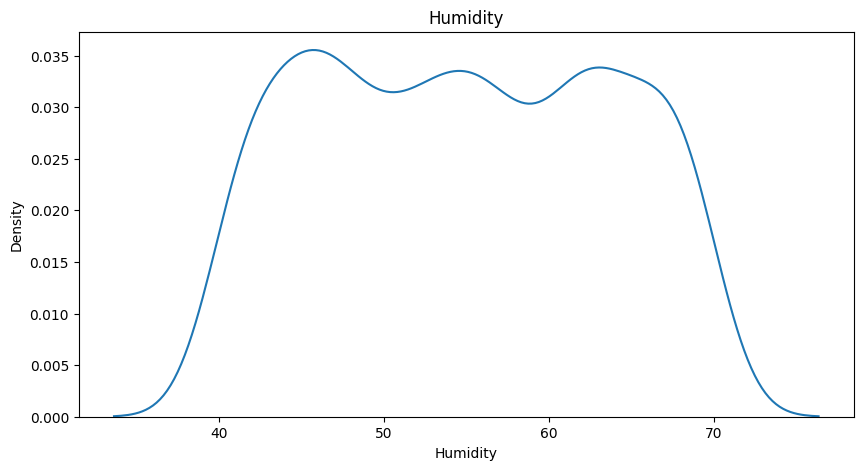

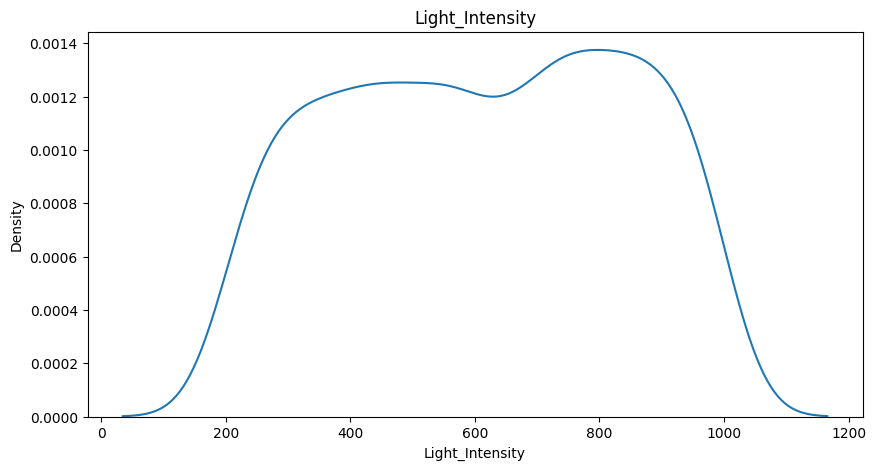

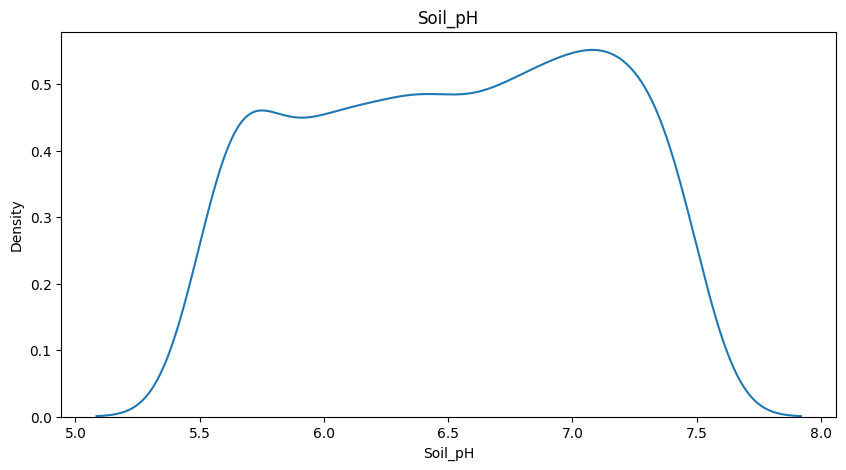

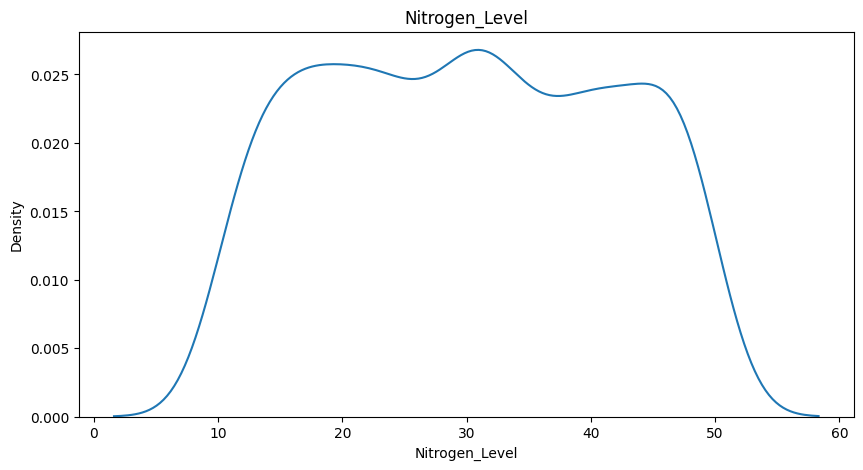

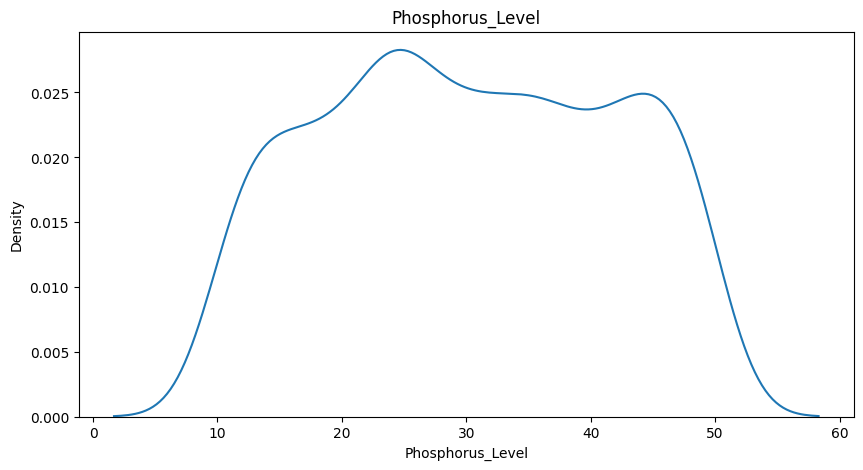

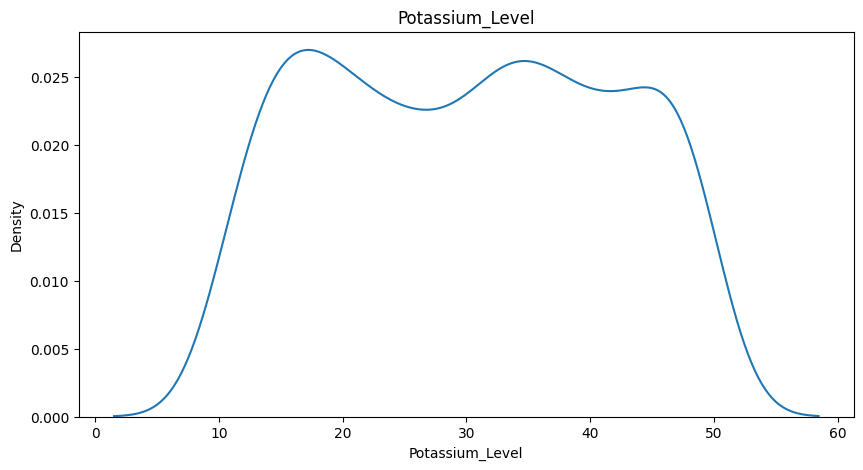

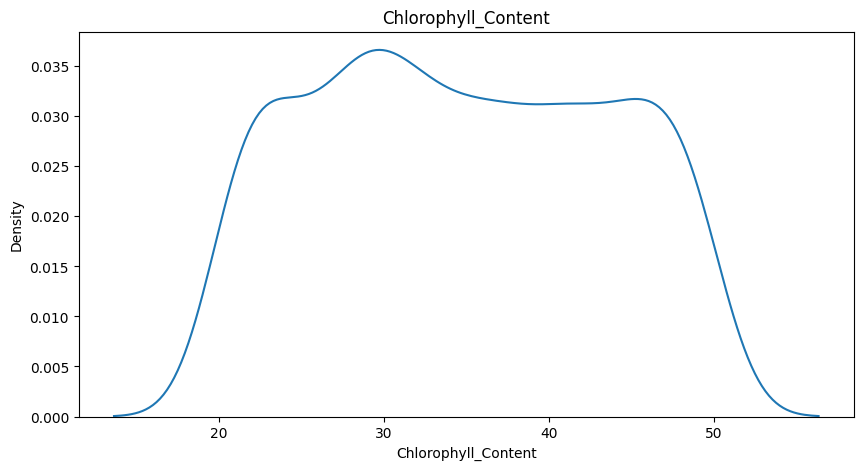

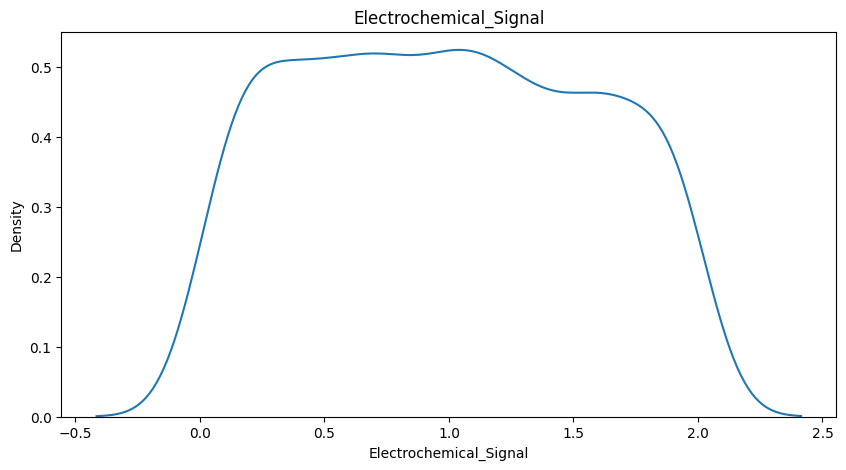

In [11]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  plt.title(i)
  sns.kdeplot(df[i])

  print()

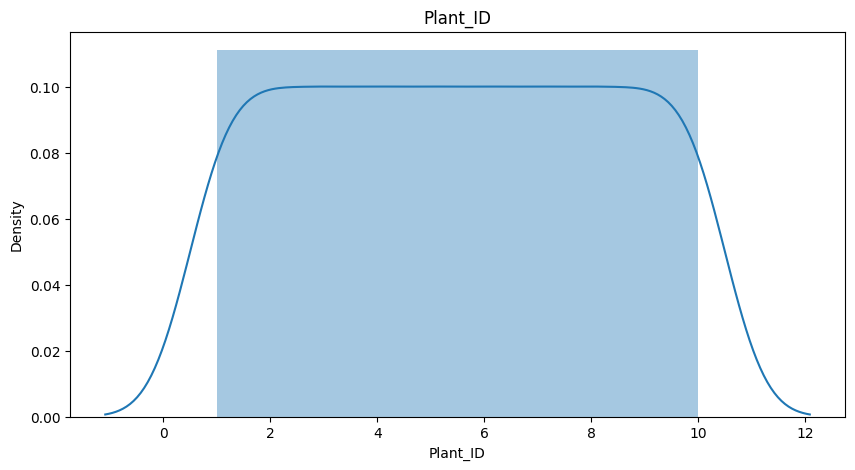

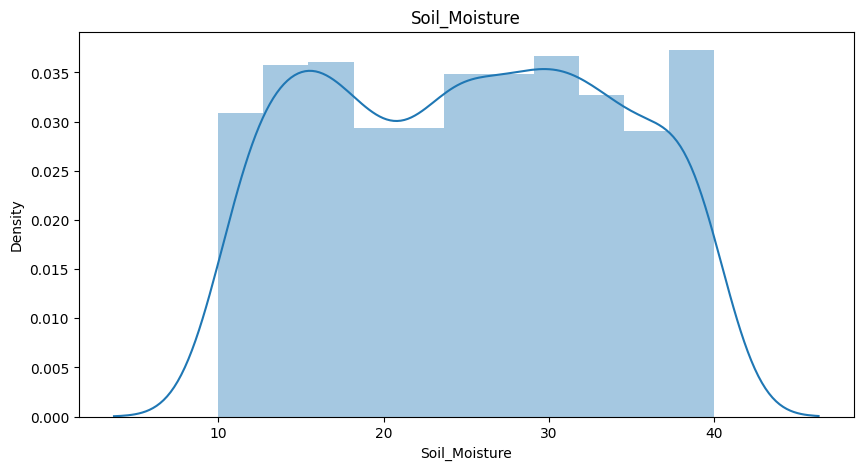

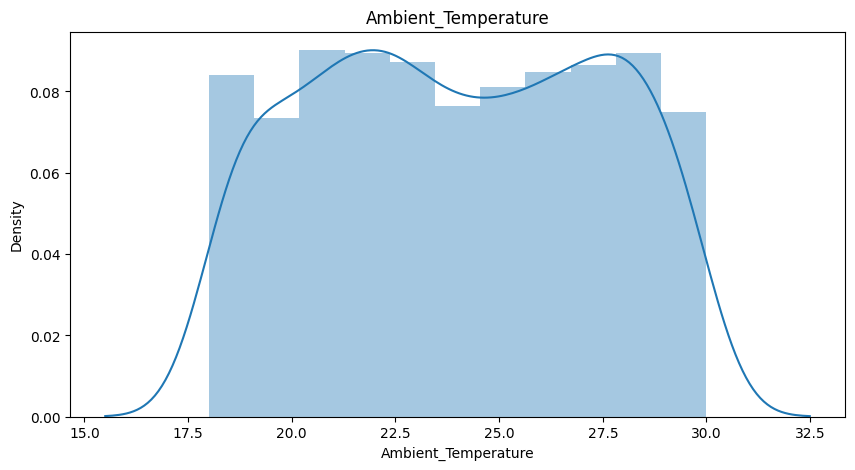

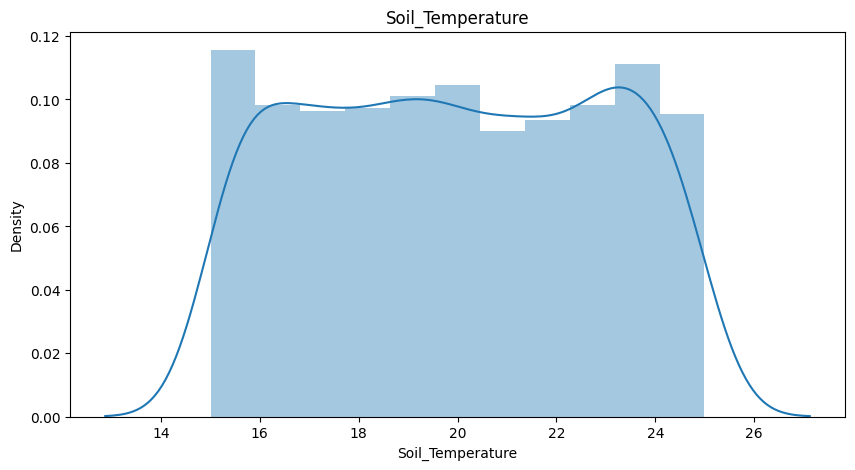

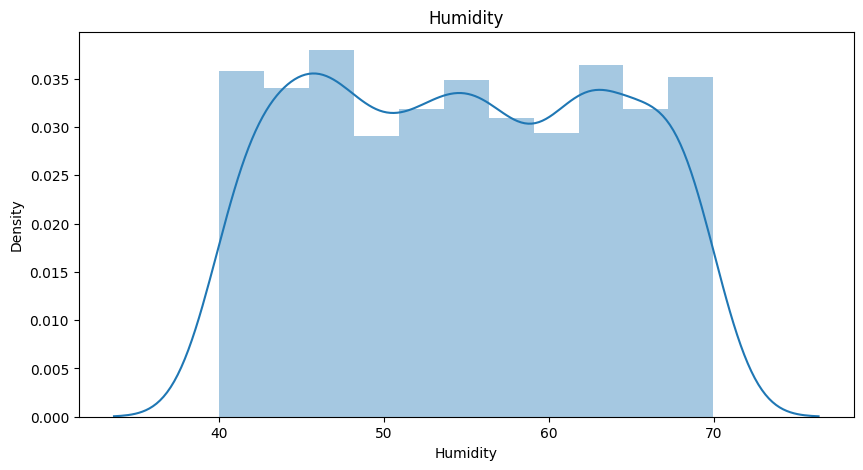

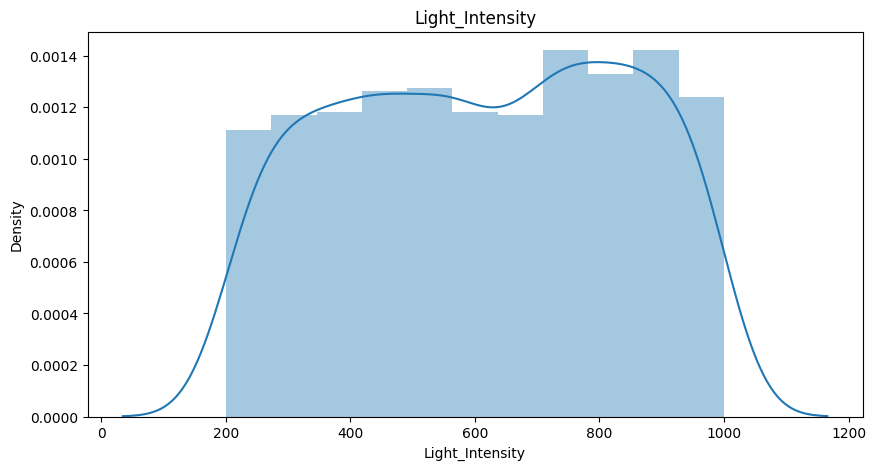

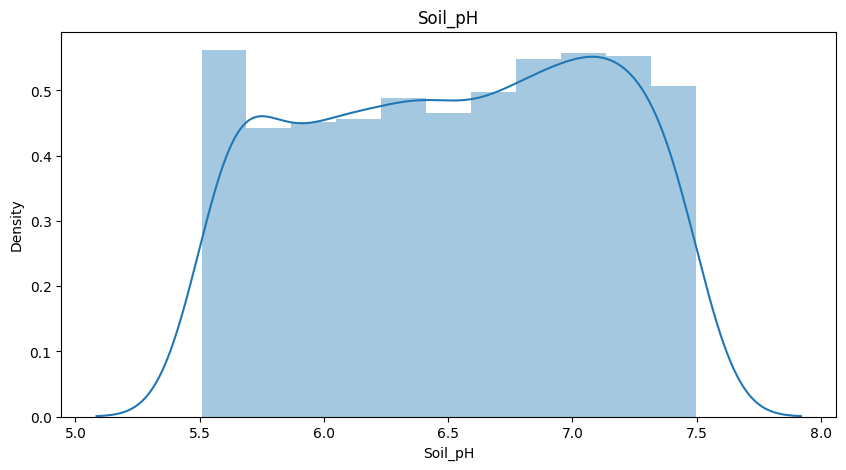

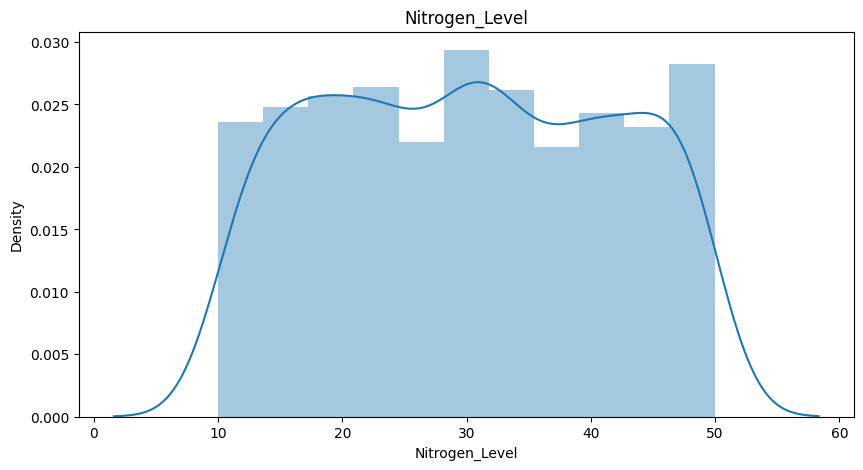

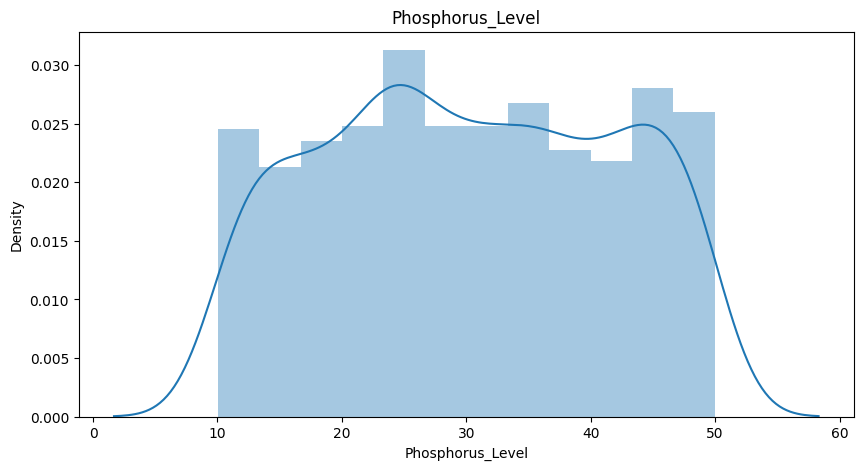

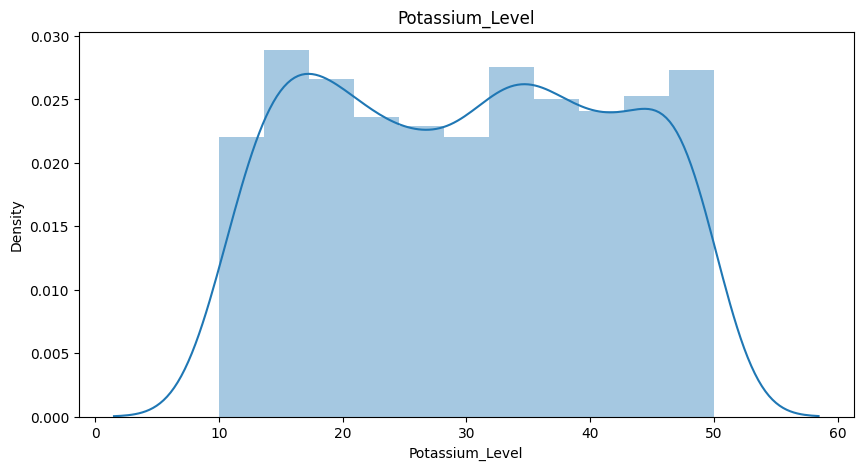

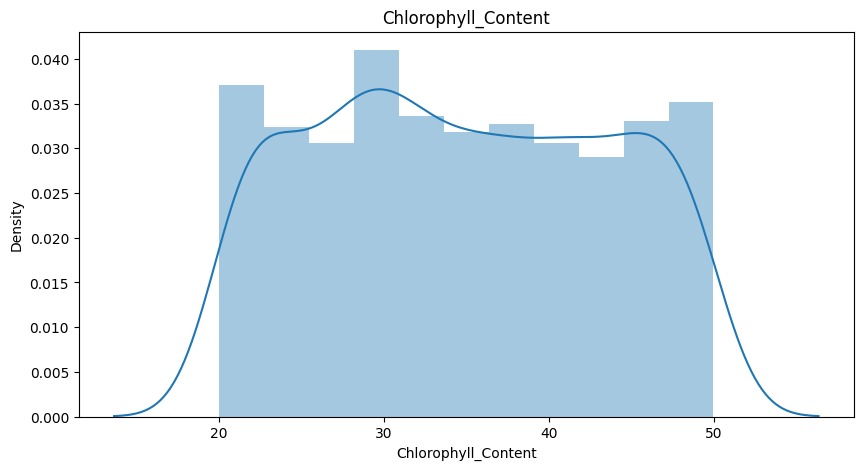

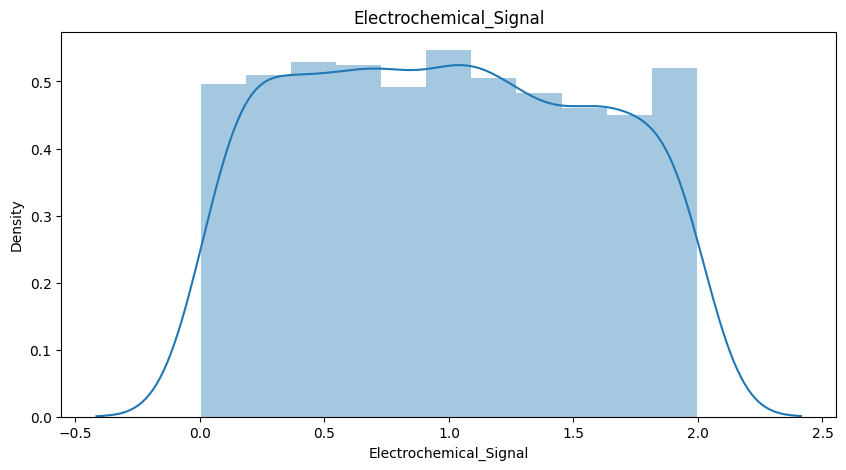

In [12]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,5))
  plt.title(i)
  sns.distplot(df[i])

  print()

In [13]:
df_dtypes = df.select_dtypes(include='number')
df_dtypes.skew()


,0
Plant_ID,0.000000
Soil_Moisture,0.000928
Ambient_Temperature,-0.006935
Soil_Temperature,0.001161
Humidity,0.021868
Light_Intensity,-0.064399
Soil_pH,-0.084956
Nitrogen_Level,0.022234
Phosphorus_Level,0.001355
Potassium_Level,0.009818


<Axes: xlabel='Soil_Moisture', ylabel='Ambient_Temperature'>

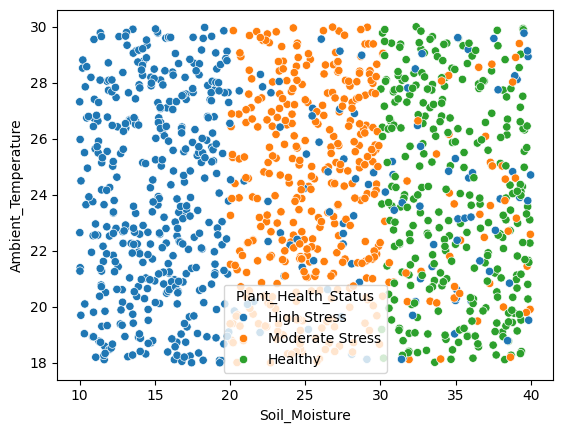

In [14]:
sns.scatterplot(x = 'Soil_Moisture', y = 'Ambient_Temperature', hue = 'Plant_Health_Status', data = df)

<Axes: xlabel='Soil_Temperature', ylabel='Humidity'>

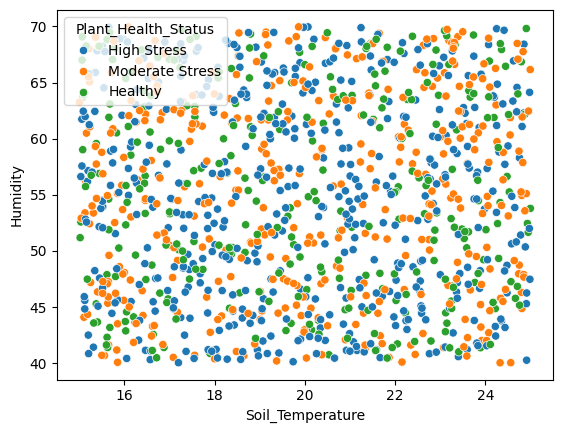

In [15]:
sns.scatterplot(x = 'Soil_Temperature', y = 'Humidity', hue = 'Plant_Health_Status', data = df)

Text(0.5, 1.0, 'Light Intensity')

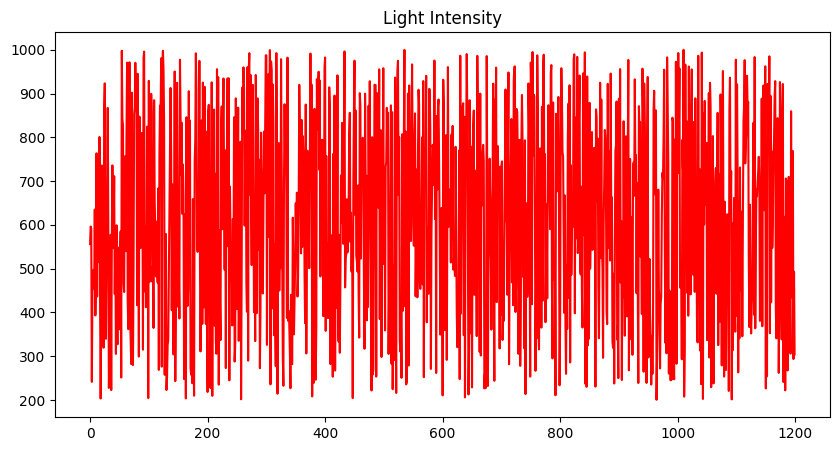

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df['Light_Intensity'], color = 'red')
plt.title('Light Intensity')


Text(0.5, 1.0, 'Electrochemical_Signal')

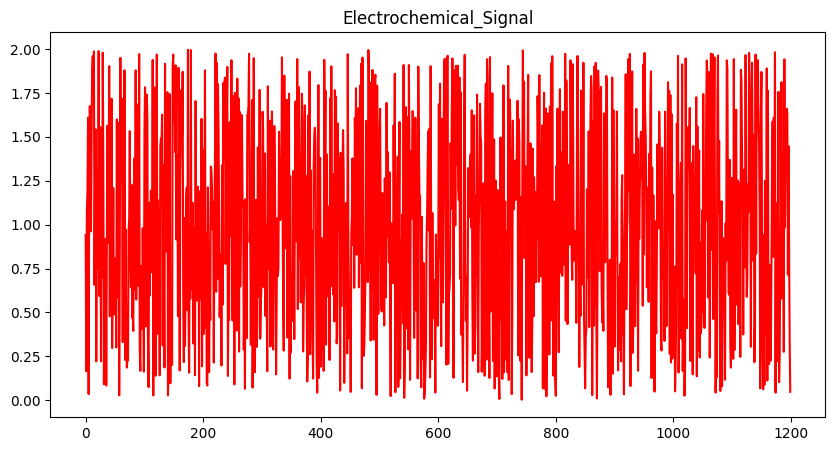

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df['Electrochemical_Signal'], color = 'red')
plt.title('Electrochemical_Signal')



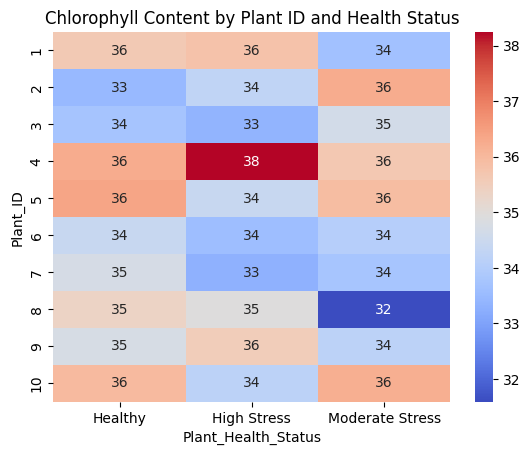

In [18]:
heatmap_data = df.pivot_table(index='Plant_ID', columns='Plant_Health_Status', values='Chlorophyll_Content', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Chlorophyll Content by Plant ID and Health Status')
plt.show()

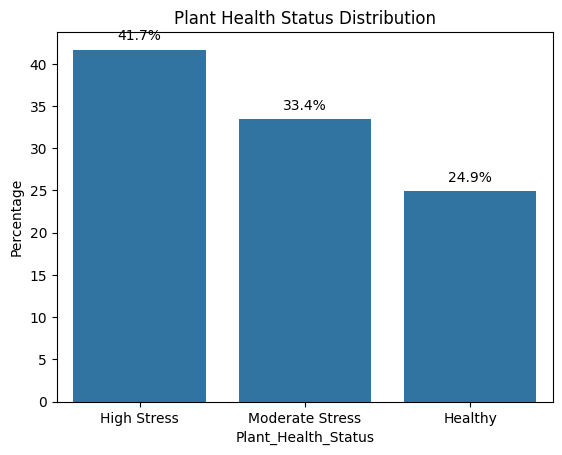

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

status_counts = df['Plant_Health_Status'].value_counts(normalize=True) * 100


ax = sns.barplot(x=status_counts.index, y=status_counts.values)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Plant Health Status Distribution')
plt.ylabel('Percentage')
plt.show()

<Axes: xlabel='Plant_Health_Status', ylabel='Light_Intensity'>

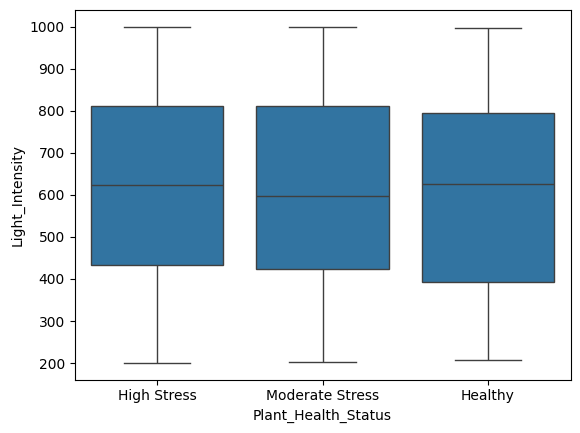

In [23]:
sns.boxplot(x = 'Plant_Health_Status', y = 'Light_Intensity', data = df)

<Axes: >

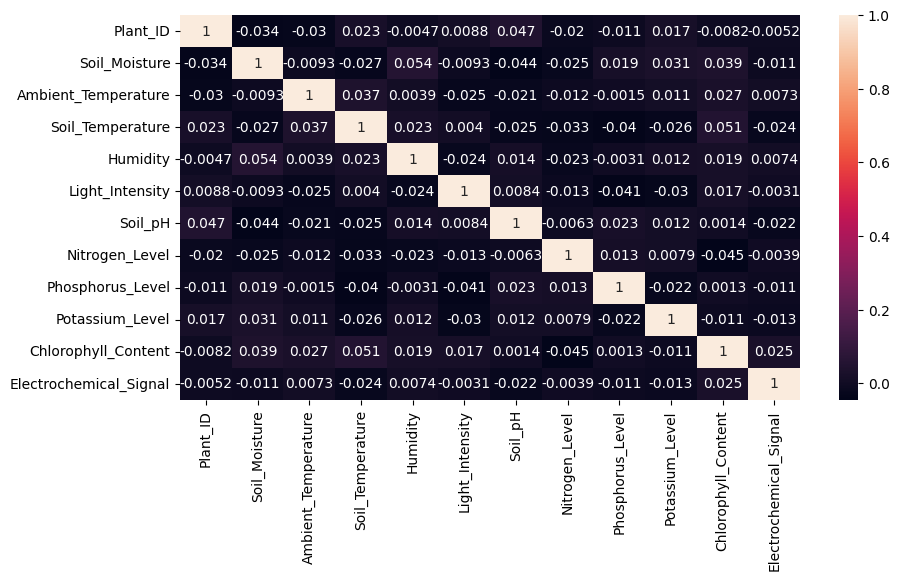

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True)